# <u>Data Mining - E-commerce Dataset for Predictive Marketing EDA and Clustering Analysis</u>

In this project, we are using unsupervised learning algorithms (K-Medoids & Hierarchical Clustering) to explore the possibilities of grouping customers of this supermarket dataset into similar clusters according to similar demands or purchasing habits to aid in targeted and effecient marketing campaigns

# Importing Used Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Loading Original Dataset

In [2]:
original_data = pd.read_csv("ECommerce_consumer behaviour.csv")

# Dataset Info & Statistics

In [3]:
original_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
original_data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


# Checking Duplicate Values

In [6]:
print(f"The number of duplicate entries: {original_data.duplicated().sum()}")

The number of duplicate entries: 0


# Checking Missing Values

In [7]:
# Sum of null values
missing_values = original_data.isnull().values.sum()
print("Total number of missing values: ",missing_values)

# Percentage of null values
missing_percentage = (original_data.isnull().sum() / len(original_data)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage)

# Highest column percentage of null values
highest_missing_percentage = missing_percentage.idxmax()
print(f"The column with the highest missing values percentage is: {highest_missing_percentage}")

Total number of missing values:  124342
Percentage of missing values for training data:
order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.157066
product_id                0.000000
add_to_cart_order         0.000000
reordered                 0.000000
department_id             0.000000
department                0.000000
product_name              0.000000
dtype: float64
The column with the highest missing values percentage is: days_since_prior_order


# Handling Missing values 

In [8]:
original_data['days_since_prior_order']=original_data['days_since_prior_order'].fillna('-1')
original_data['days_since_prior_order']=original_data['days_since_prior_order'].astype(int)

# Sum of null values
missing_values = original_data.isnull().values.sum()
print("Total number of missing values: ",missing_values)

# Percentage of null values
missing_percentage = (original_data.isnull().sum() / len(original_data)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage)

Total number of missing values:  0
Percentage of missing values for training data:
order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
product_id                0.0
add_to_cart_order         0.0
reordered                 0.0
department_id             0.0
department                0.0
product_name              0.0
dtype: float64


# Visualizing some hidden patterns

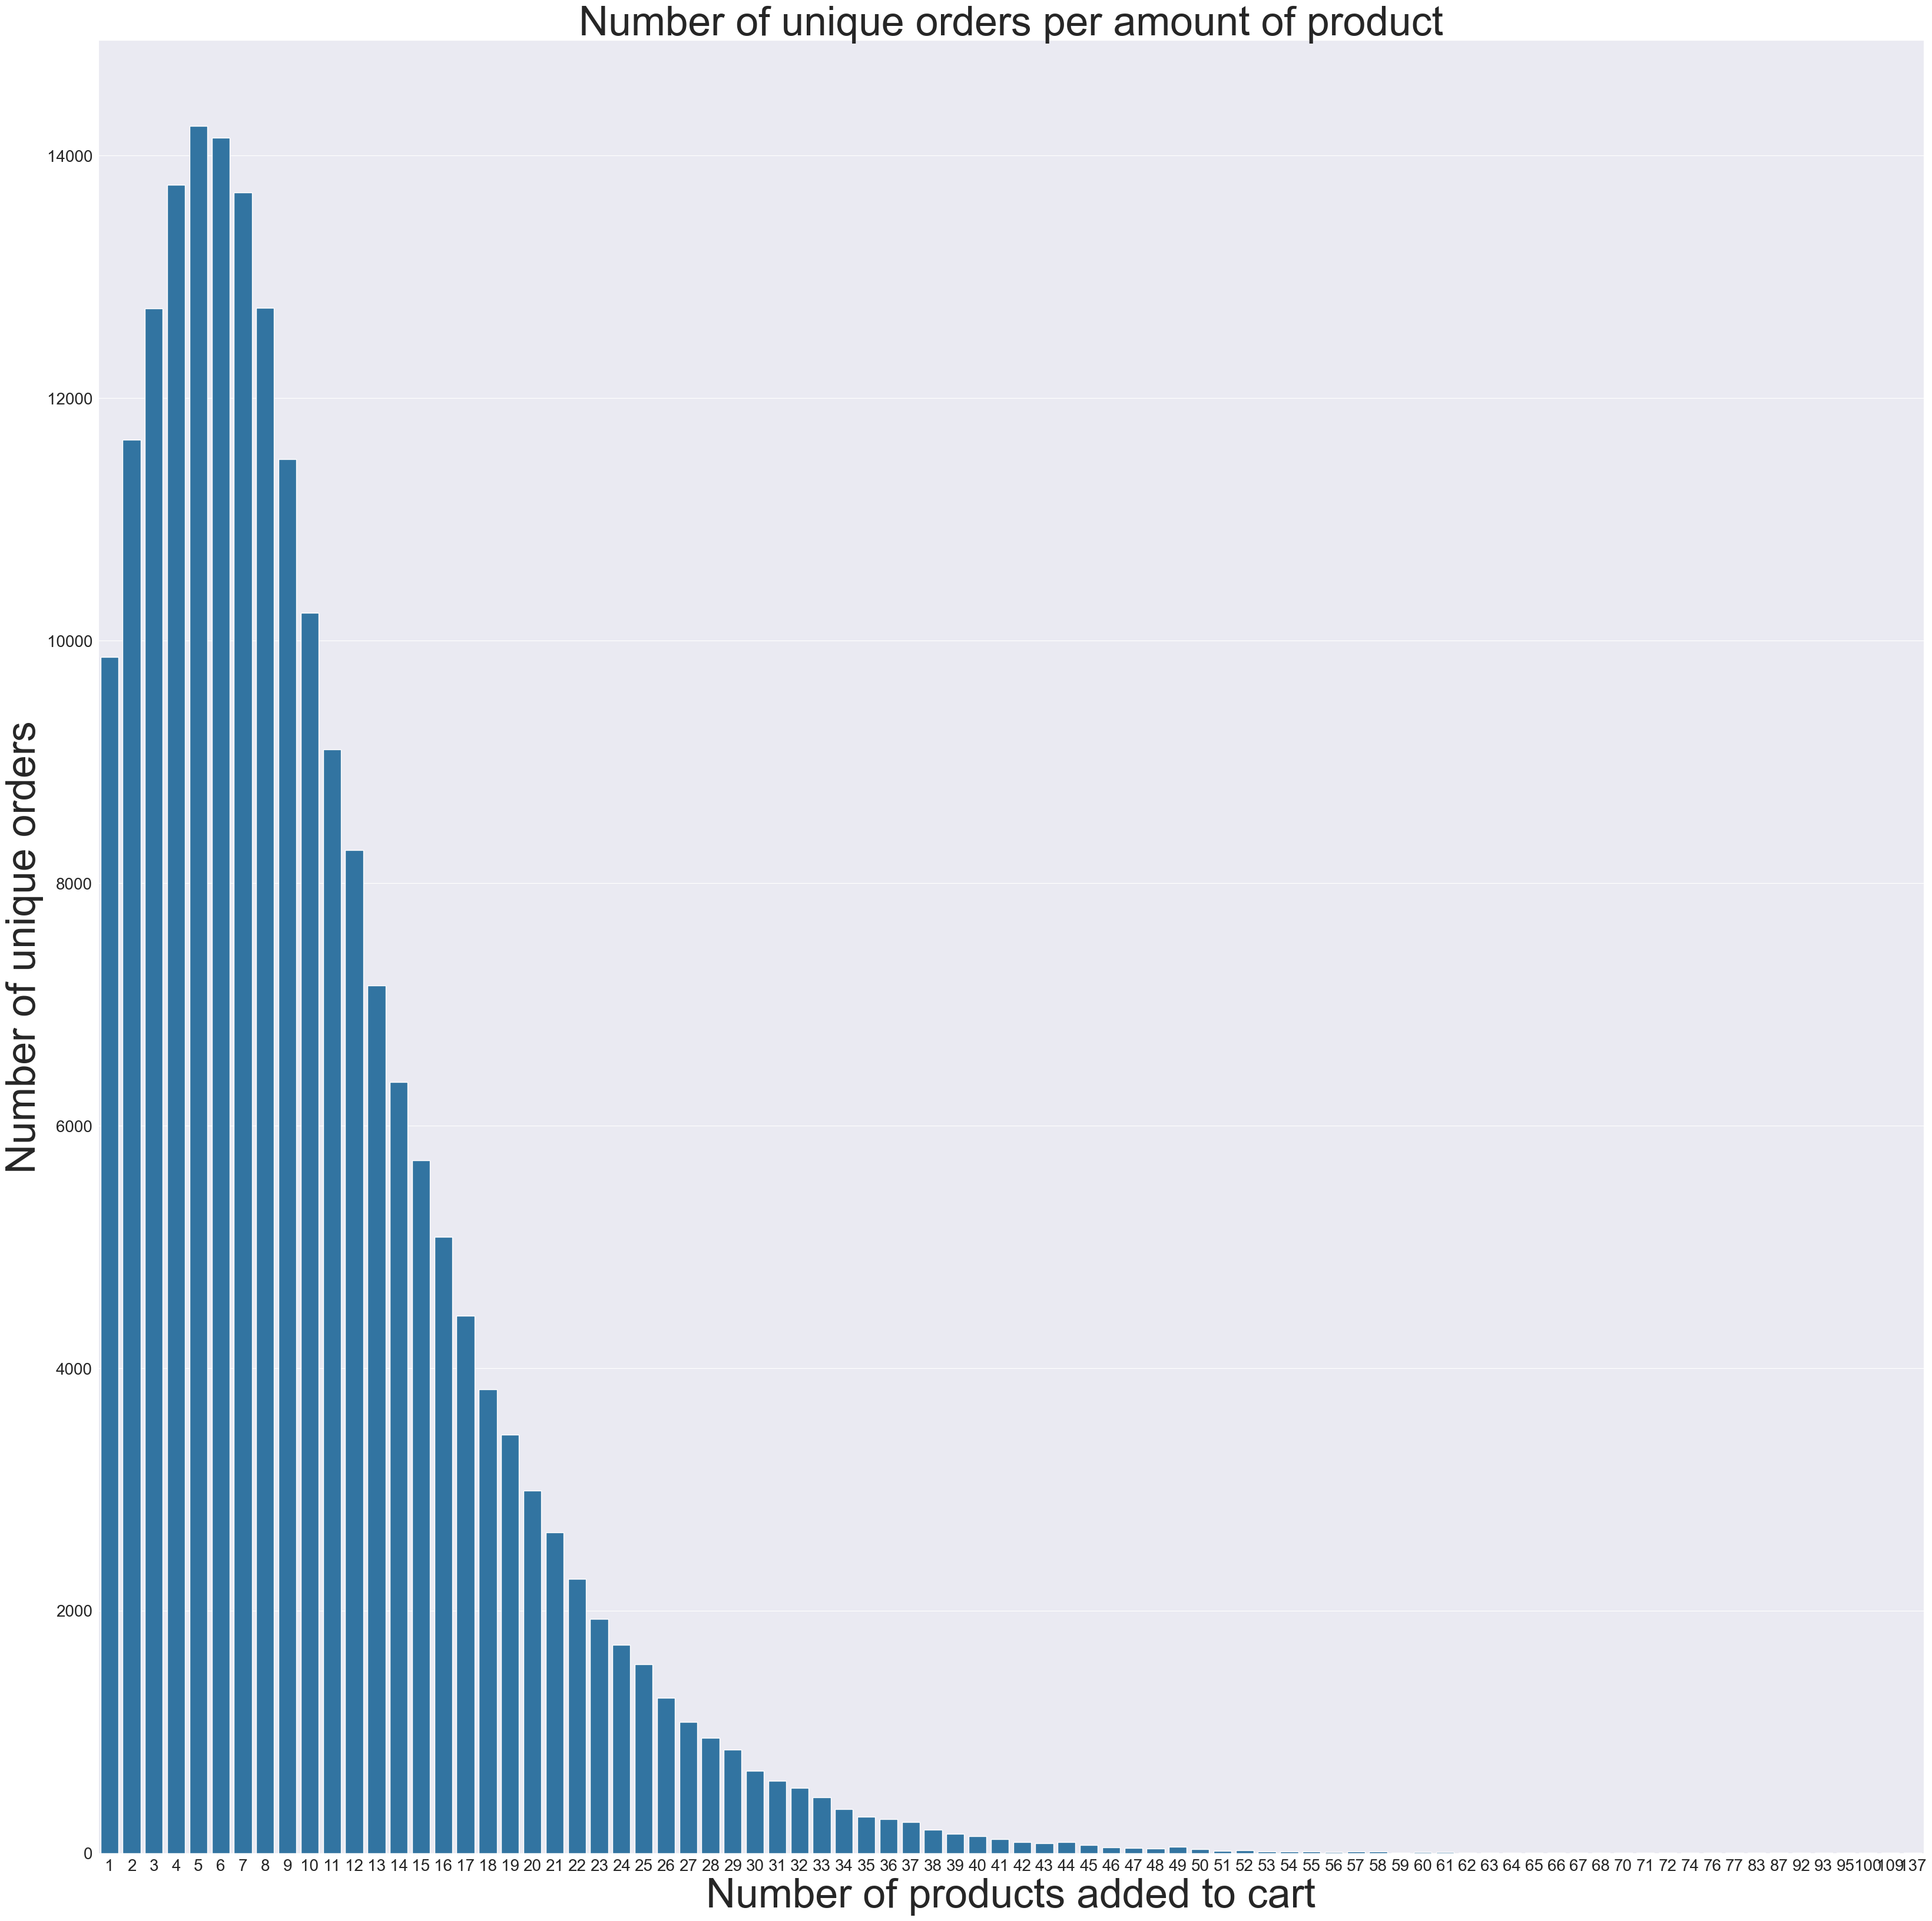

In [9]:
# Number of orders for each number of products added to cart
grouped = original_data.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

plt.subplots(figsize=(40, 40))
sns.barplot(x=grouped.index, y=grouped.values)

plt.title("Number of unique orders per amount of product", fontsize=50)
plt.ylabel('Number of unique orders', fontsize=50)
plt.xlabel('Number of products added to cart', fontsize=50)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

array([<Axes: ylabel='user_id'>], dtype=object)

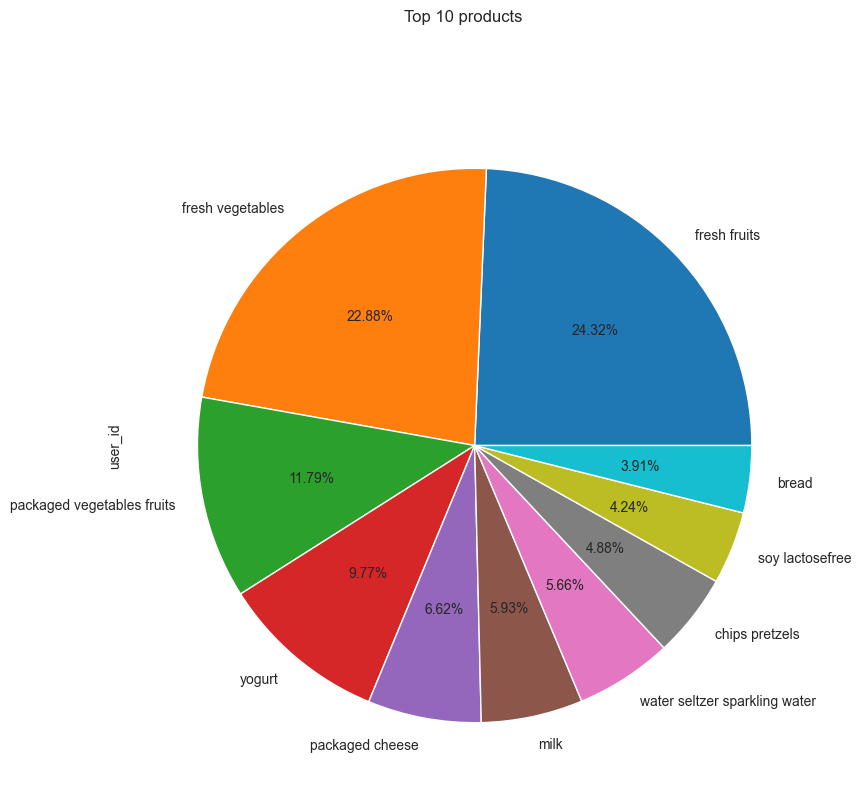

In [10]:
# Pie Chart of the top 10 most purchased products
product_counts = original_data.groupby('product_name')['user_id'].count()
top_10_products = product_counts.sort_values(ascending=False).head(10)
top_10_products.plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Top 10 products', figsize=(9, 9))

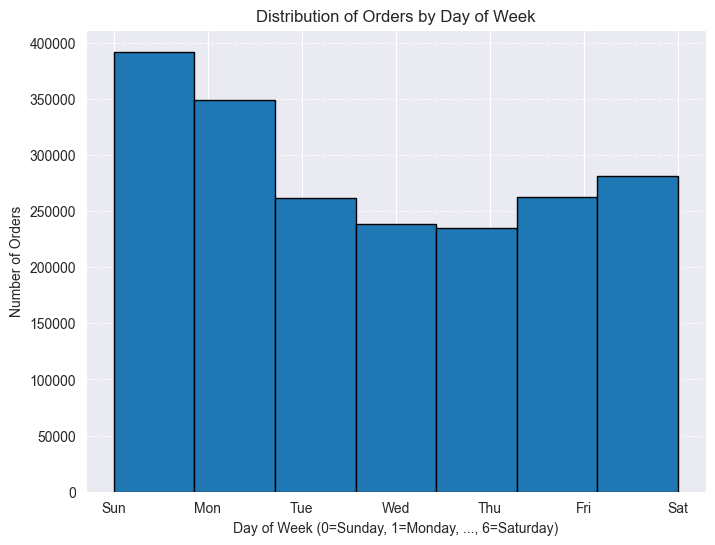

In [11]:
# Number of orders by day of the week
plt.figure(figsize=(8, 6))
plt.hist(original_data['order_dow'], bins=7, edgecolor='black')
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week (0=Sunday, 1=Monday, ..., 6=Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

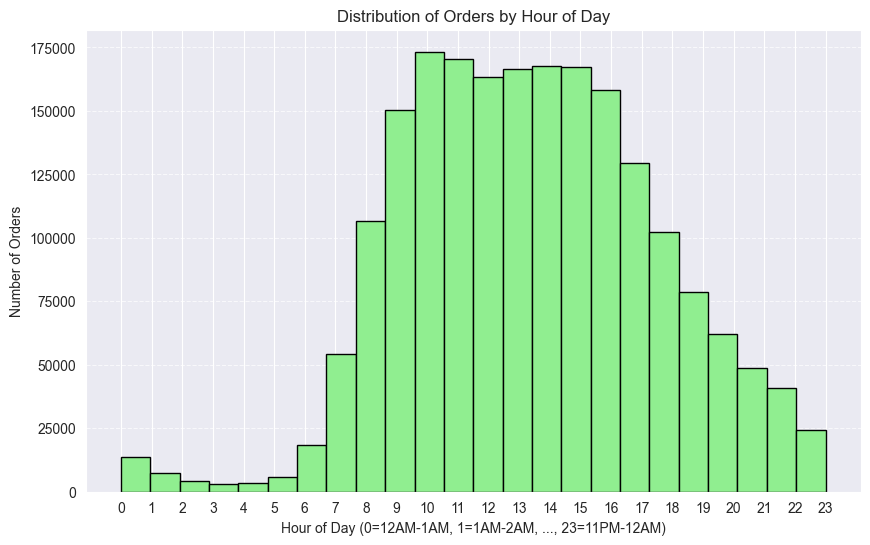

In [12]:
# Number of orders by hour of day
plt.figure(figsize=(10, 6))
plt.hist(original_data['order_hour_of_day'], bins=24, color='lightgreen', edgecolor='black')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0=12AM-1AM, 1=1AM-2AM, ..., 23=11PM-12AM)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identifying and Removing outliers

In [13]:
numerical_columns = original_data.select_dtypes(include=['int64']).columns

def remove_outliers_IQR(original_data, numerical_columns, threshold=2):
    for col in numerical_columns:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_data = remove_outliers_IQR(original_data, numerical_columns)

# Displaying number of outliers removed from each numerical column
for col in numerical_columns:
    outliers_removed = len(original_data[col]) - len(new_data[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}") 

Number of outliers removed in order_id: 92400
Number of outliers removed in user_id: 92400
Number of outliers removed in order_number: 92400
Number of outliers removed in order_dow: 92400
Number of outliers removed in order_hour_of_day: 92400
Number of outliers removed in product_id: 92400
Number of outliers removed in add_to_cart_order: 92400
Number of outliers removed in reordered: 92400
Number of outliers removed in department_id: 92400


# Computing correlation between numerical features 

<Axes: title={'center': 'Heatmap showing correlation for all numerical features'}>

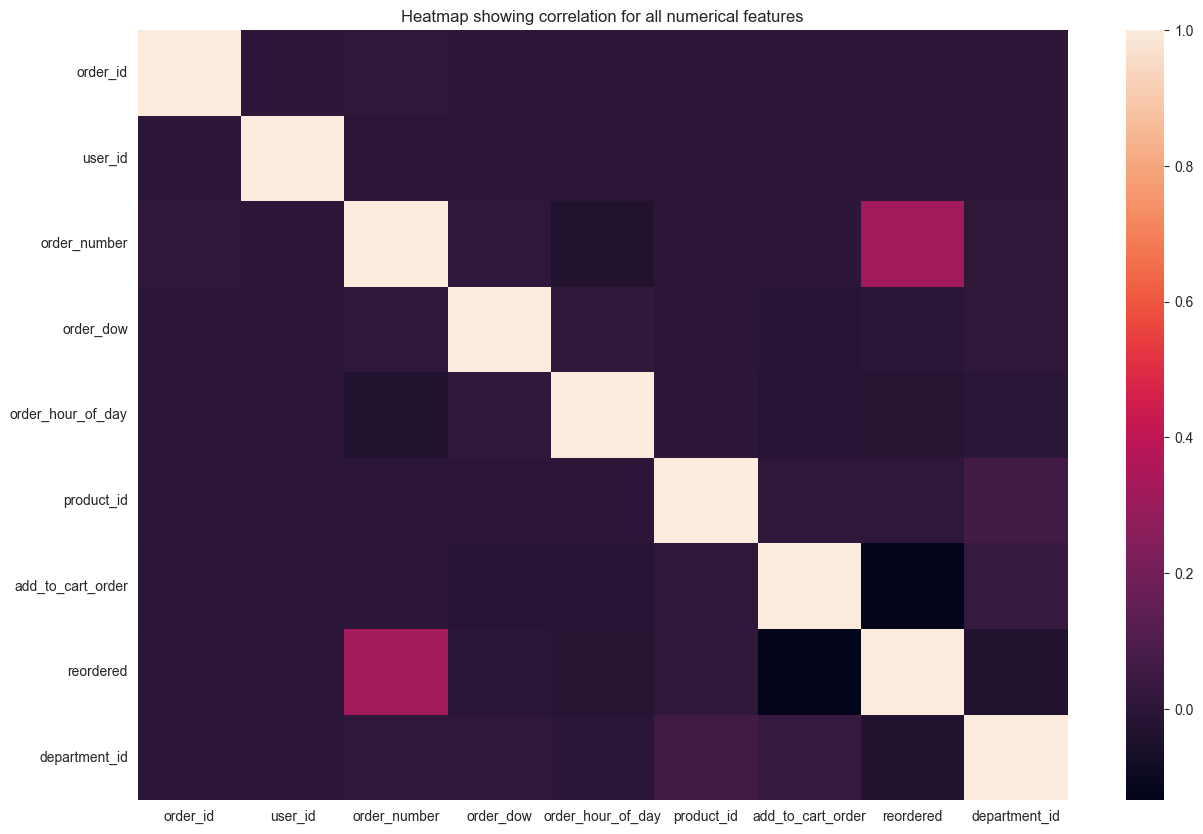

In [14]:
corr_matrix = new_data[numerical_columns].corr()
plt.figure(figsize = (15,10))
plt.title("Heatmap showing correlation for all numerical features")
sns.heatmap(corr_matrix)

# Performing Standard Scaler 

In [15]:
scaler = StandardScaler()
features_to_scale = [column for column in new_data[numerical_columns]]
new_data[features_to_scale] = pd.DataFrame(scaler.fit_transform(new_data[features_to_scale]), columns=features_to_scale)

# Encoding Categorical Features

In [16]:
new_data=pd.get_dummies(new_data)

# Taking a sample from the dataset

In [17]:
# Set a random seed for reproducibility
np.random.seed(42)
new_data=new_data.sample(n=100)

 # Performing PCA

In [18]:
pca = PCA(n_components=2)  # Choosing 2D for visualization
new_data = pca.fit_transform(new_data)

# Applying K_medoids Algorithm

In [19]:
k = 2
K_medoids = KMedoids(k).fit(new_data)
clusters = K_medoids.cluster_centers_
labels = K_medoids.labels_
print('labels : ', labels, '\n')
print('clusters : ', clusters, '\n')

# Evaluate clustering performance using silhouette score
k_medoids_silhouette = silhouette_score(new_data, labels)
print("Silhouette Score:", k_medoids_silhouette)

# Evaluate clustering performance using davies_bouldin_score
k_medoids_davies_bouldin = davies_bouldin_score(new_data, labels)
print("davies_bouldin:", k_medoids_davies_bouldin)

labels :  [1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1] 

clusters :  [[17.28297811 -0.97620716]
 [-4.67550717  0.11469841]] 

Silhouette Score: 0.7666998382741141
davies_bouldin: 0.35696426629688305


# Using the Elbow Method for finding the optimal number of clusters (K)

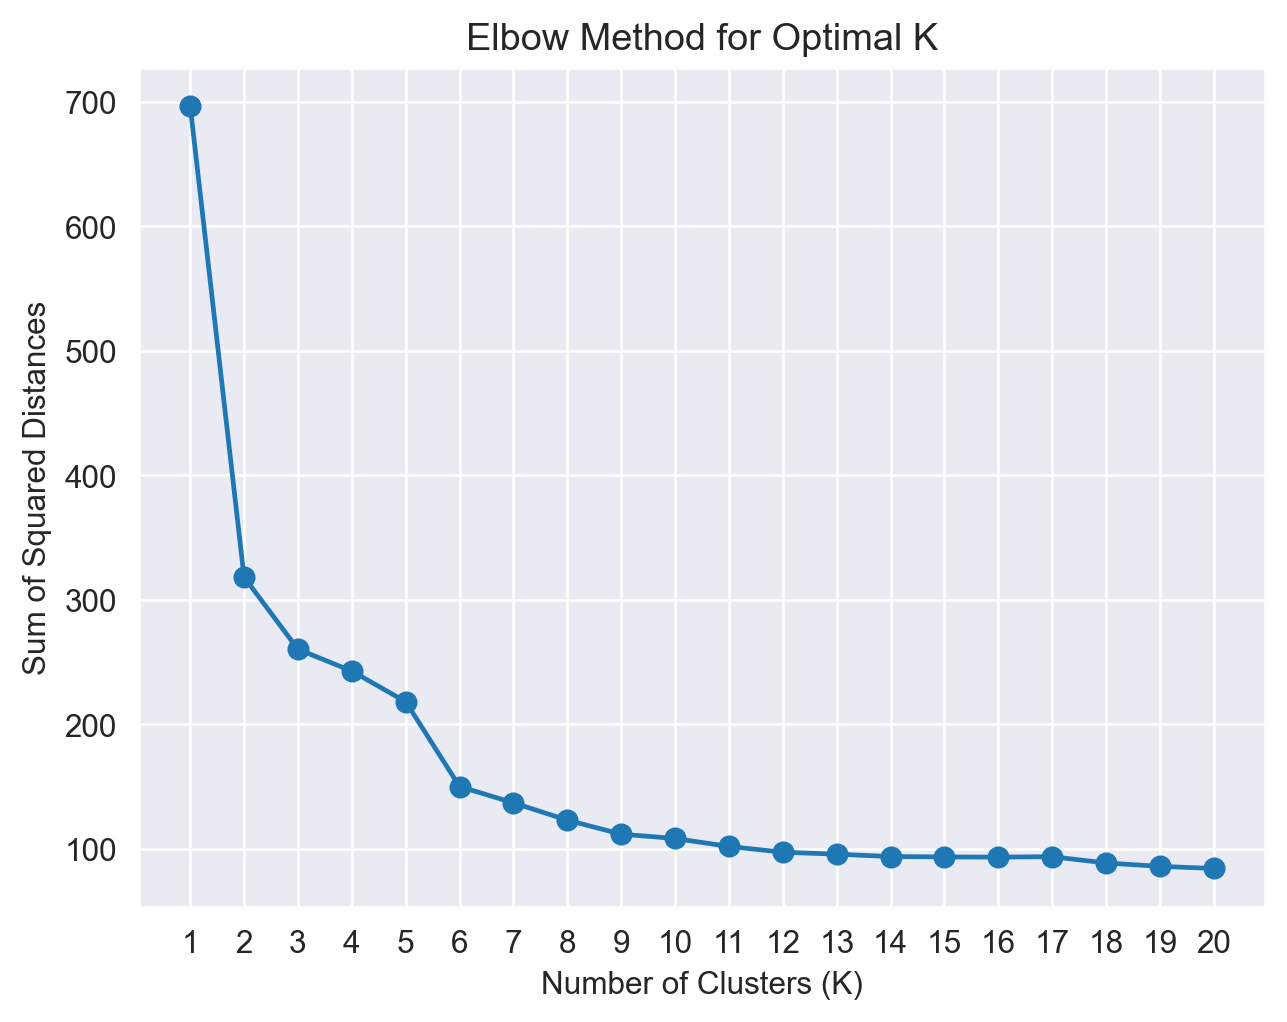

In [20]:
k_values = range(1, 21)  # Evaluate from 1 to 20 clusters

# Calculate the Within-Clusters Sum of Squares (WCSS) for each value of K
costs = []
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(new_data)
    costs.append(kmedoids.inertia_)

# Plot the elbow curve
plt.rcParams['figure.dpi'] = 227
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

# Plotting the Produced Clusters

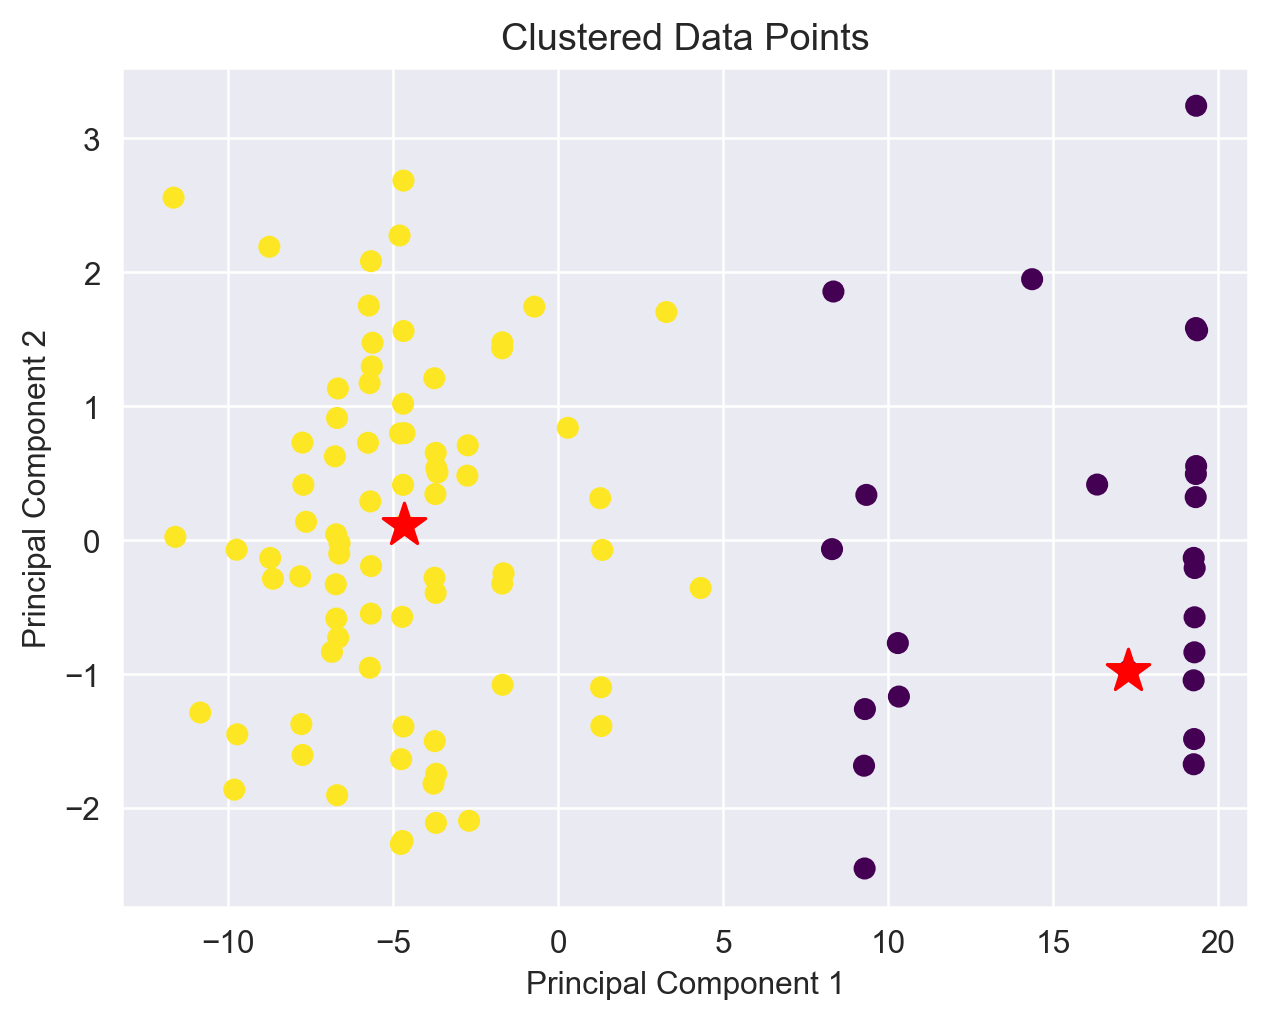

In [21]:
# Plot clustered data points
plt.scatter(new_data[:, 0], new_data[:, 1], c=labels, cmap='viridis')
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='*', s=200)  # Plot cluster centroids
plt.title('Clustered Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Applying Hierachical Clustering

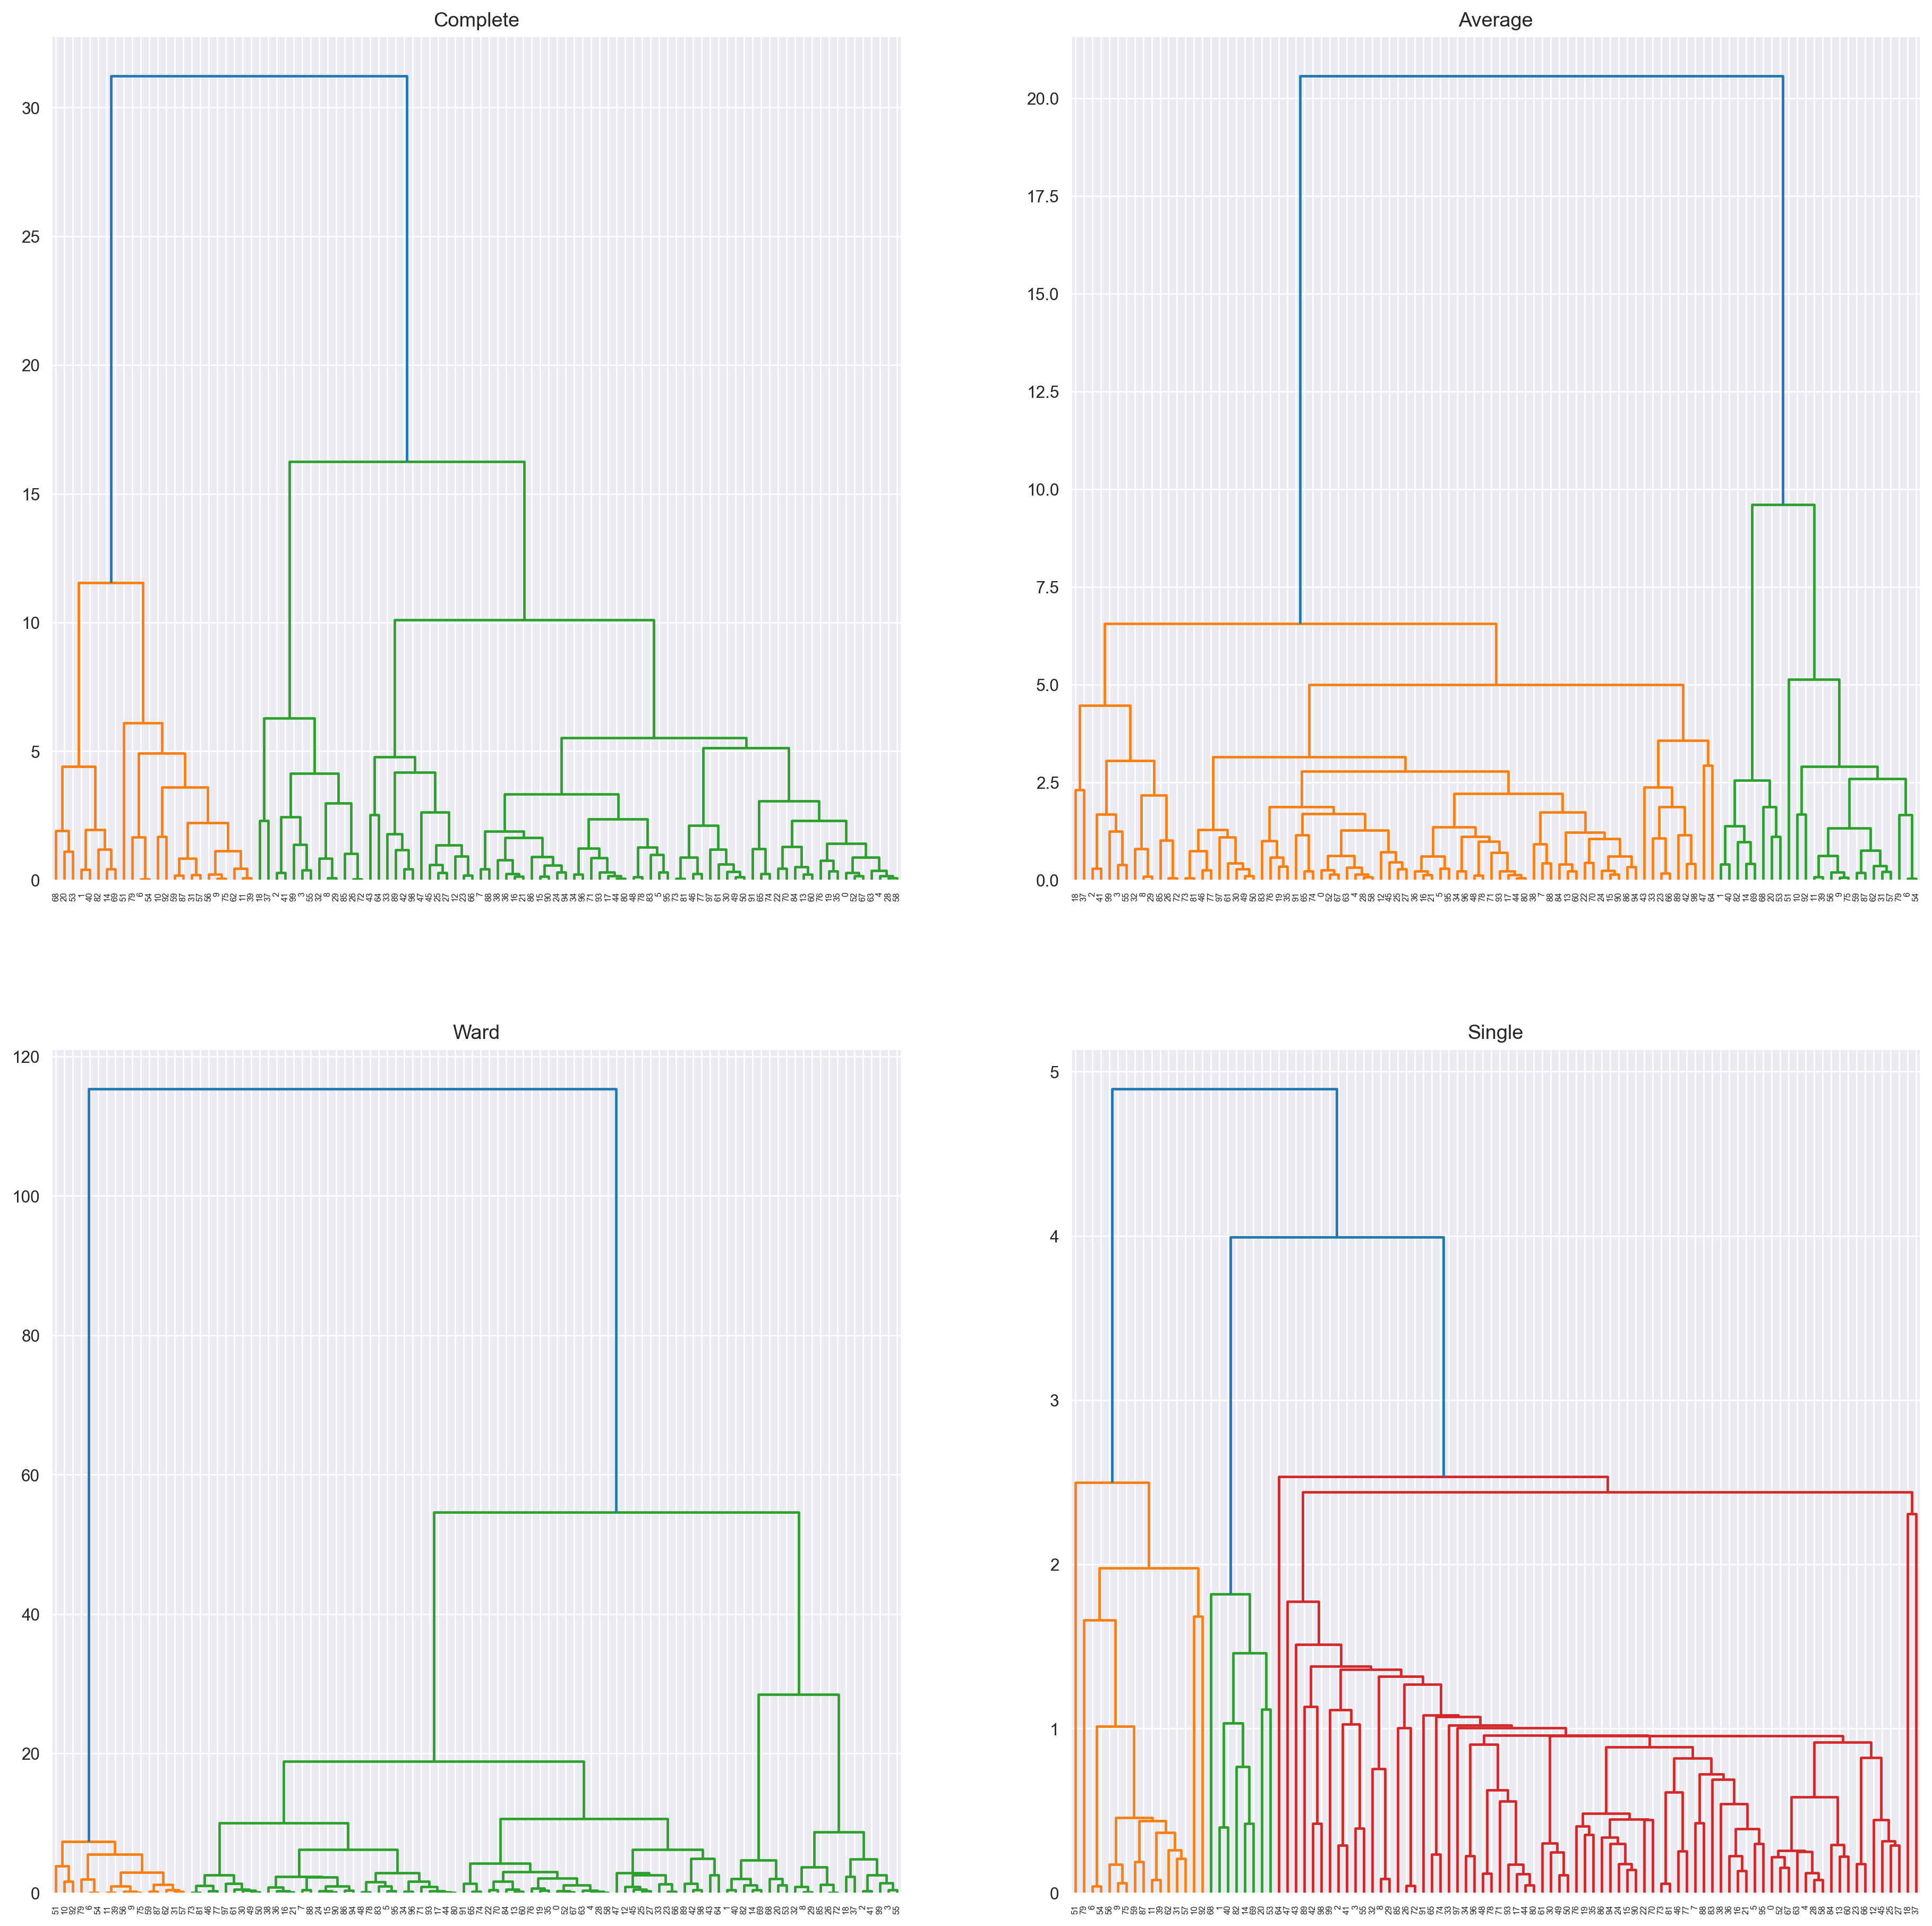

In [22]:
plt.figure(figsize=(20,20))

z_complete=linkage(new_data, method='complete', metric='euclidean')
z_average=linkage(new_data, method='average', metric='euclidean')
z_ward=linkage(new_data, method='ward', metric='euclidean')
z_single=linkage(new_data, method='single', metric='euclidean')

plt.subplot(2,2,1), dendrogram(z_complete), plt.title('Complete')
plt.subplot(2,2,2), dendrogram(z_average), plt.title('Average')
plt.subplot(2,2,3), dendrogram(z_ward), plt.title('Ward')
plt.subplot(2,2,4), dendrogram(z_single), plt.title('Single')
plt.show()

## Evaluation of Hierarchical Method

In [23]:
labels_complete = fcluster(z_complete, 3, criterion='maxclust')  
labels_average = fcluster(z_average, 3, criterion='maxclust')  
labels_ward = fcluster(z_ward, 3, criterion='maxclust')  
labels_single = fcluster(z_single, 3, criterion='maxclust')  

# Evaluating clustering performance using silhouette score
silhouette_avg1 = silhouette_score(new_data, labels_complete)
silhouette_avg2 = silhouette_score(new_data, labels_average)
silhouette_avg3 = silhouette_score(new_data, labels_ward)
silhouette_avg4 = silhouette_score(new_data, labels_single)

# Calculating mean silhouette score
hierarchical_silhouette = np.array([silhouette_avg1, silhouette_avg2, silhouette_avg3, silhouette_avg4]).mean()
print('Mean silhouette score:', hierarchical_silhouette)

# Evaluating clustering performance using davies_bouldin_score
davies_bouldin1 = davies_bouldin_score(new_data, labels_complete)
davies_bouldin2 = davies_bouldin_score(new_data, labels_average)
davies_bouldin3 = davies_bouldin_score(new_data, labels_ward)
davies_bouldin4 = davies_bouldin_score(new_data, labels_single)

# Calculating mean davies_bouldin_score
hierarchical_davies_bouldin = np.array([davies_bouldin1, davies_bouldin2, davies_bouldin3, davies_bouldin4]).mean()
print('Mean davies_bouldin_score :', hierarchical_davies_bouldin)

Mean silhouette score: 0.6309475730638582
Mean davies_bouldin_score : 0.4470921275844366


## Plotting every Linkage Method's Silhouette Score over clusters (K)

In [24]:
def plot_silhouette_over_k(Z):
    # Calculate silhouette scores for different numbers of clusters
    silhouette_scores = []
    heights = np.unique(Z[:, 2])
    for height in np.unique(Z[:, 2]):
        # Extract cluster labels based on current height
        labels = fcluster(Z, height, criterion='distance')
        n_clusters = len(np.unique(labels))
        if n_clusters > 1:  # Ensure at least two clusters
            # Compute silhouette score
            silhouette_scores.append(silhouette_score(new_data, labels))
        else:
            silhouette_scores.append(-1)
        
    # Interpolate silhouette scores for all unique heights
    interp_silhouette_scores = np.interp(np.unique(Z[:, 2]), heights, silhouette_scores)

    # Find the index of maximum silhouette score
    max_silhouette_idx = np.argmax(interp_silhouette_scores)
    max_silhouette_height = np.unique(Z[:, 2])[max_silhouette_idx]
    max_silhouette_score = interp_silhouette_scores[max_silhouette_idx]
    
    # Plot silhouette scores
    plt.plot(np.unique(Z[:, 2]), interp_silhouette_scores, marker='o', label='Silhouette Scores')
    plt.xlabel('Height')
    plt.ylabel('Silhouette Score')

    plt.scatter(max_silhouette_height, max_silhouette_score, color='red', s=100, label=f'Max Silhouette Score: {max_silhouette_score:.2f}')

    plt.legend()

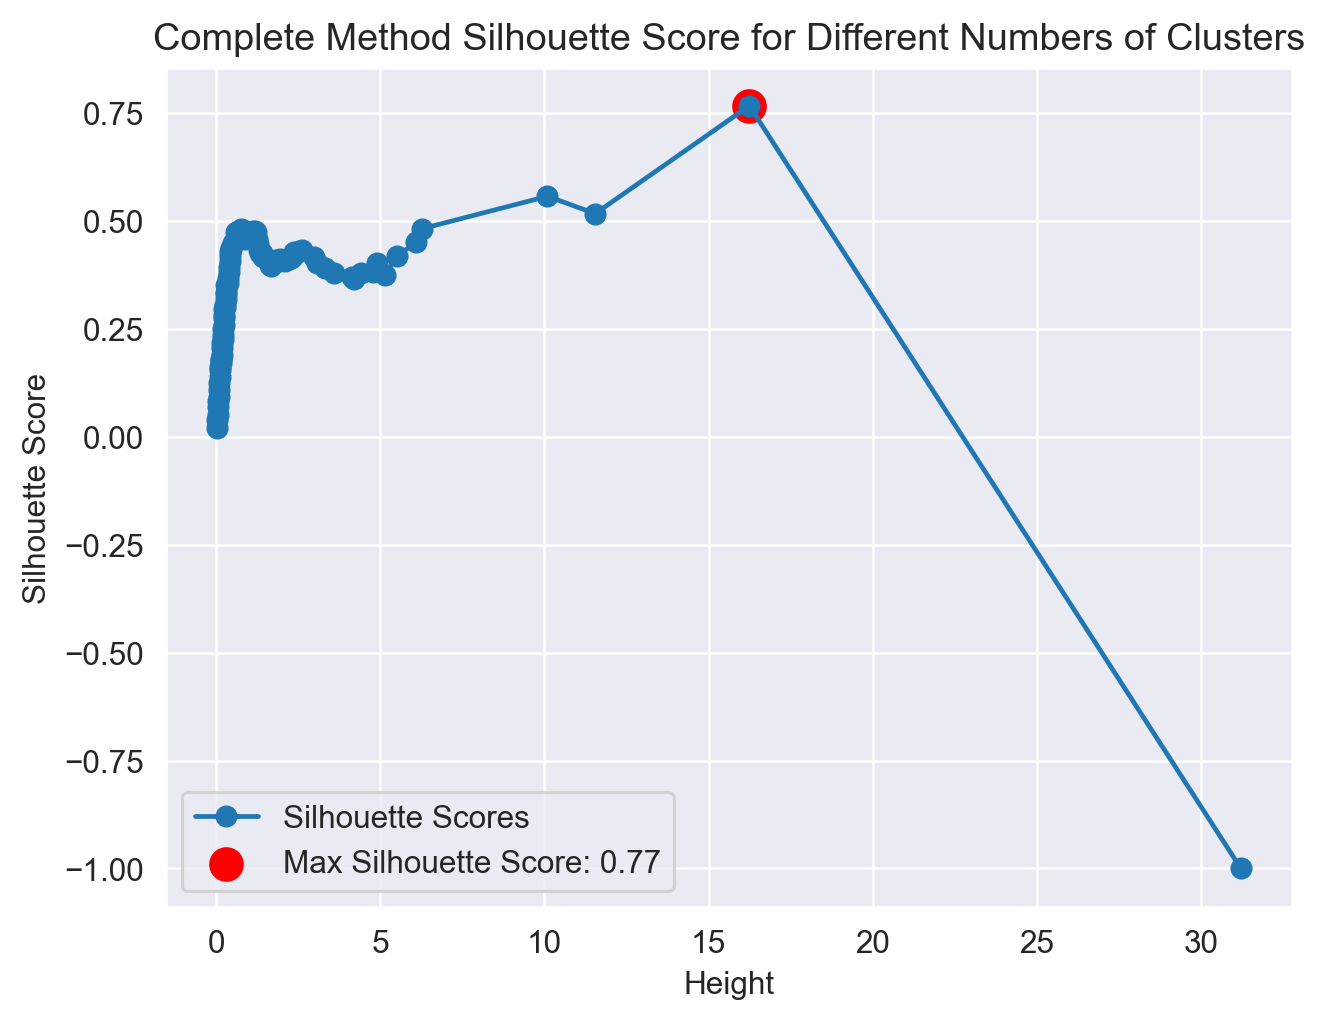

In [25]:
plot_silhouette_over_k(z_complete)
plt.title('Complete Method Silhouette Score for Different Numbers of Clusters')
plt.show()

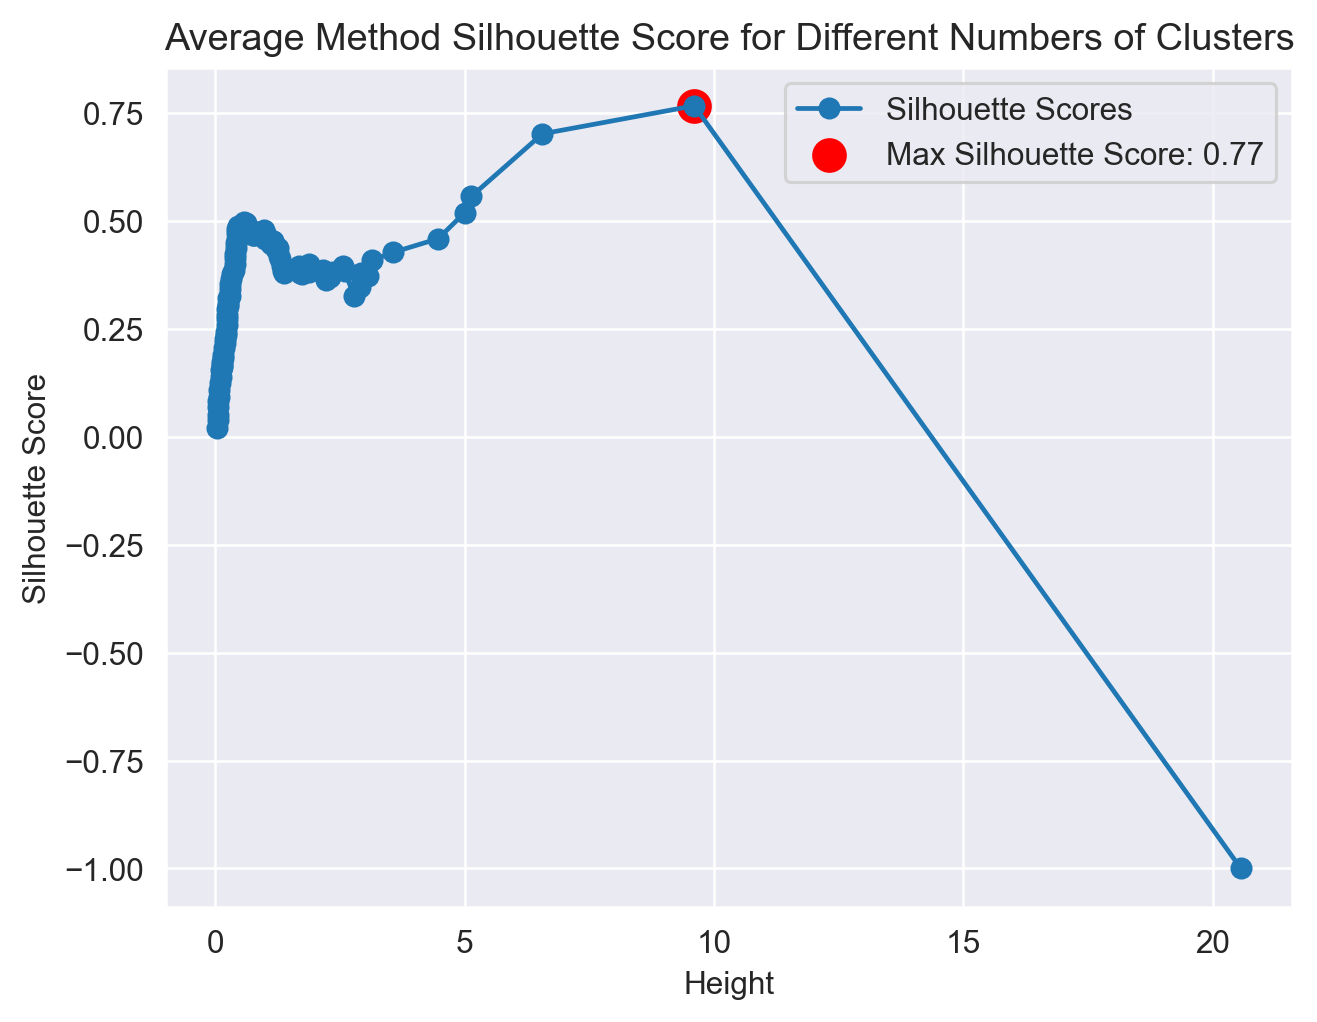

In [26]:
plot_silhouette_over_k(z_average)
plt.title('Average Method Silhouette Score for Different Numbers of Clusters')
plt.show()

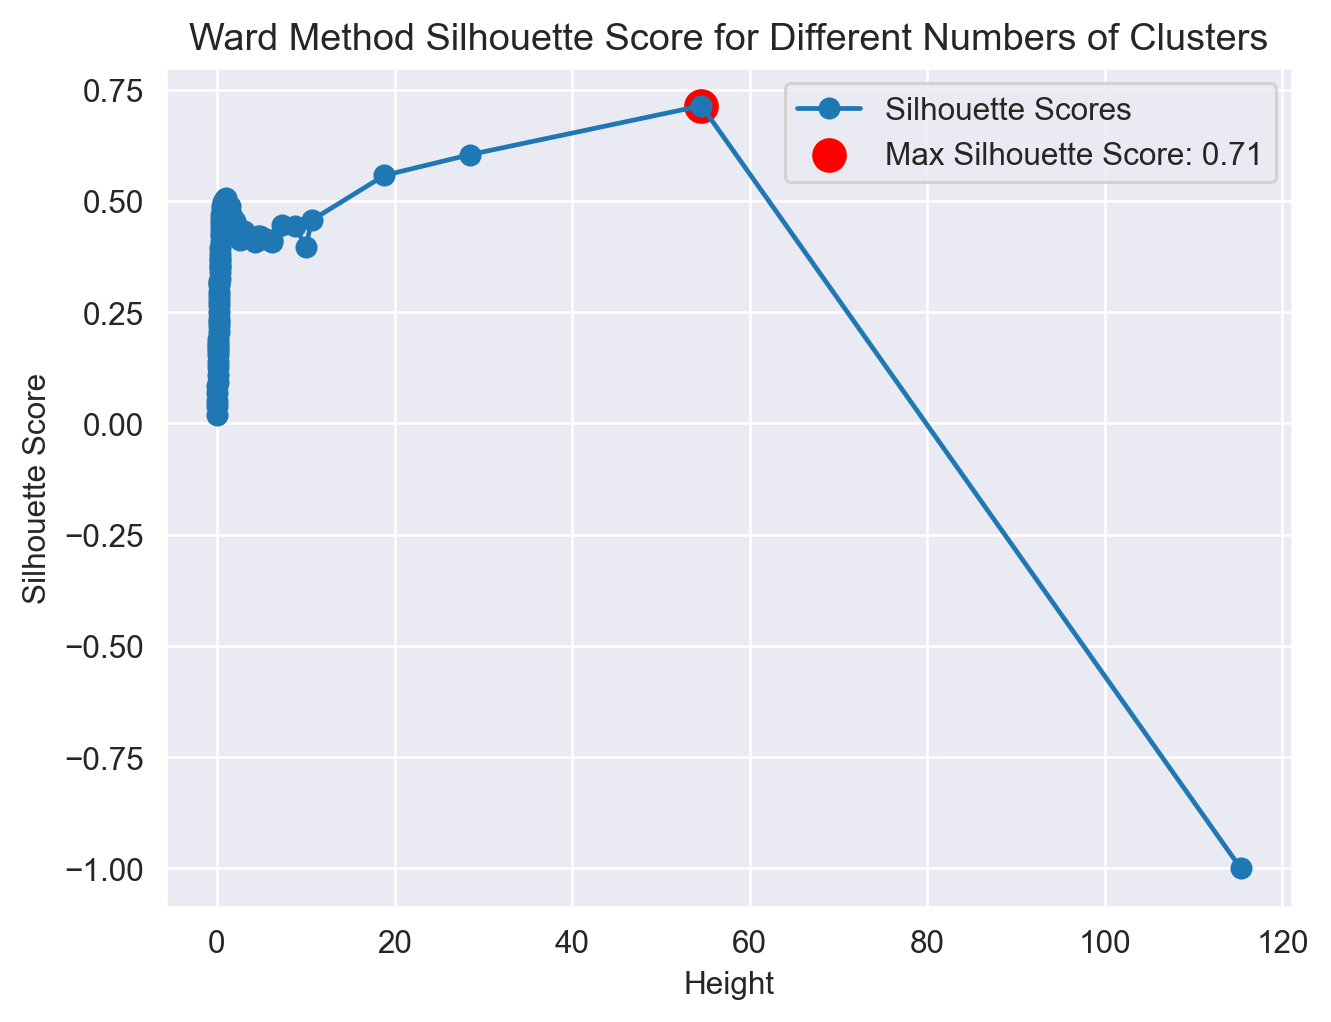

In [27]:
plot_silhouette_over_k(z_ward)
plt.title('Ward Method Silhouette Score for Different Numbers of Clusters')
plt.show()

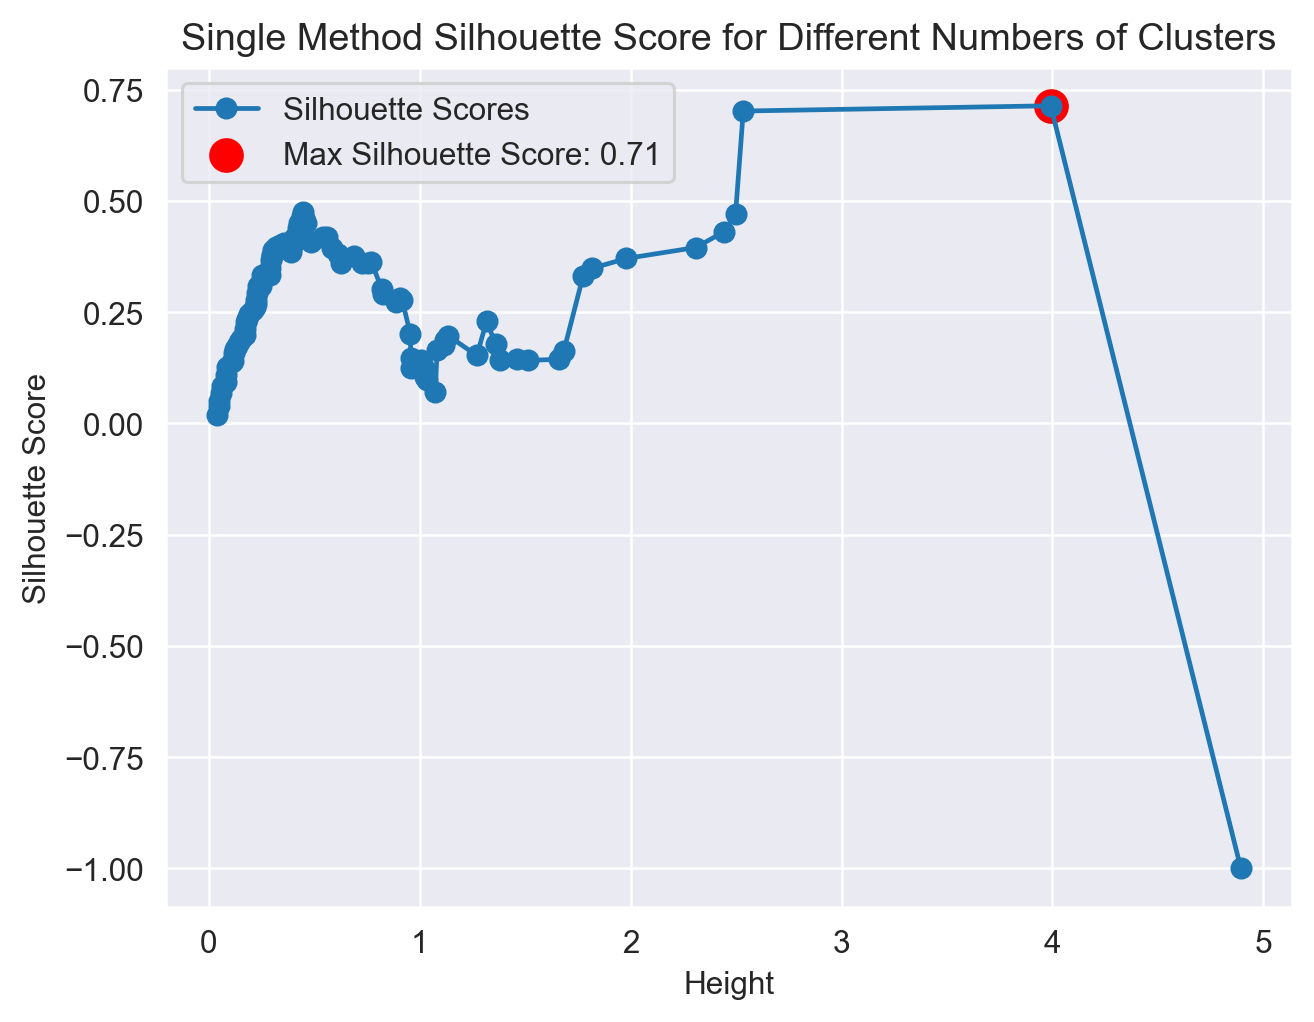

In [28]:
plot_silhouette_over_k(z_single)
plt.title('Single Method Silhouette Score for Different Numbers of Clusters')
plt.show()

## Plotting the Horizontal Line that best cuts the Dendrograms into Optimal Clusters (K)

In [29]:
def max_silhouette_height(Z):
    silhouette_scores = []
    heights = np.unique(Z[:, 2])
    for height in np.unique(Z[:, 2]):
        # Extract cluster labels based on current height
        labels = fcluster(Z, height, criterion='distance')
        n_clusters = len(np.unique(labels))
        if n_clusters > 1:  # Ensure at least two clusters
            # Compute silhouette score
            silhouette_scores.append(silhouette_score(new_data, labels))
        else:
            silhouette_scores.append(-1)
        
    # Interpolate silhouette scores for all unique heights
    interp_silhouette_scores = np.interp(np.unique(Z[:, 2]), heights, silhouette_scores)

    # Find the index of maximum silhouette score
    max_silhouette_idx = np.argmax(interp_silhouette_scores)
    max_silhouette_height = np.unique(Z[:, 2])[max_silhouette_idx]
    max_silhouette_score = interp_silhouette_scores[max_silhouette_idx]
    
    return max_silhouette_height, max_silhouette_score

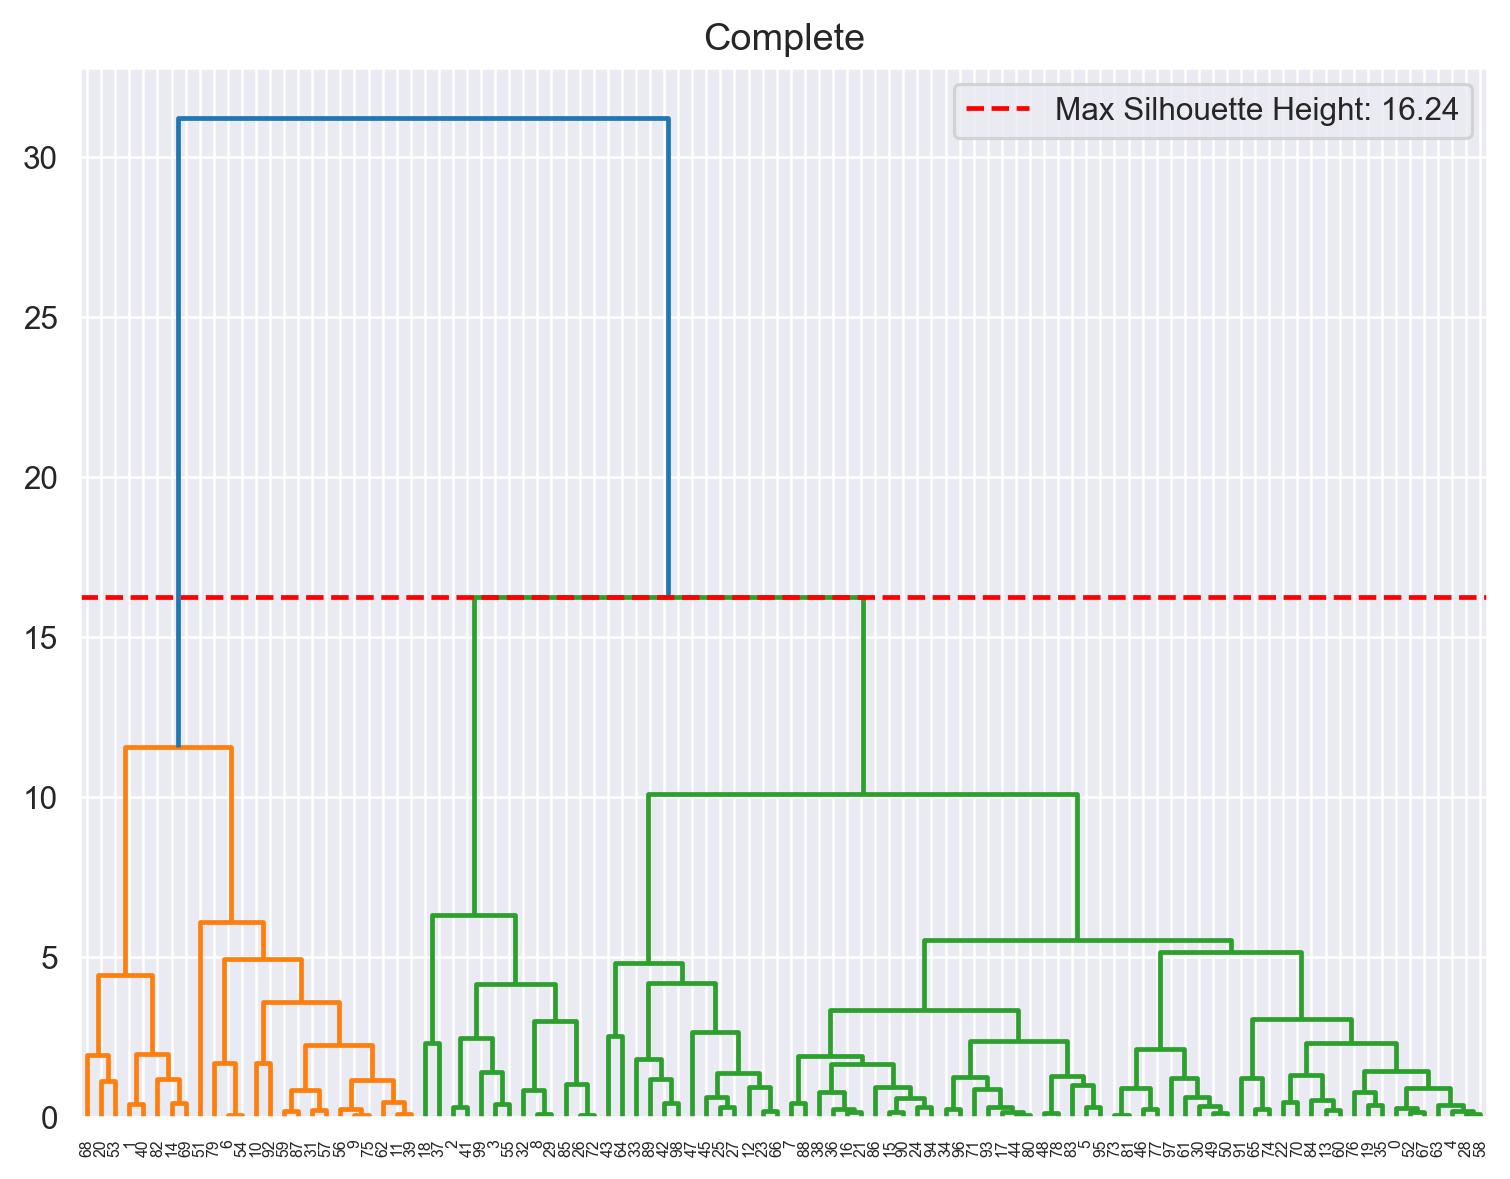

In [30]:
# Plot for Complete linkage
plt.figure(figsize=(8, 6))
dendrogram(z_complete)
plt.title('Complete')
max_sil_height_1 = max_silhouette_height(z_complete)[0]
plt.axhline(y=max_sil_height_1, color='red', linestyle='--', label='Max Silhouette Height: {:.2f}'.format(max_sil_height_1))
plt.legend()
plt.show()

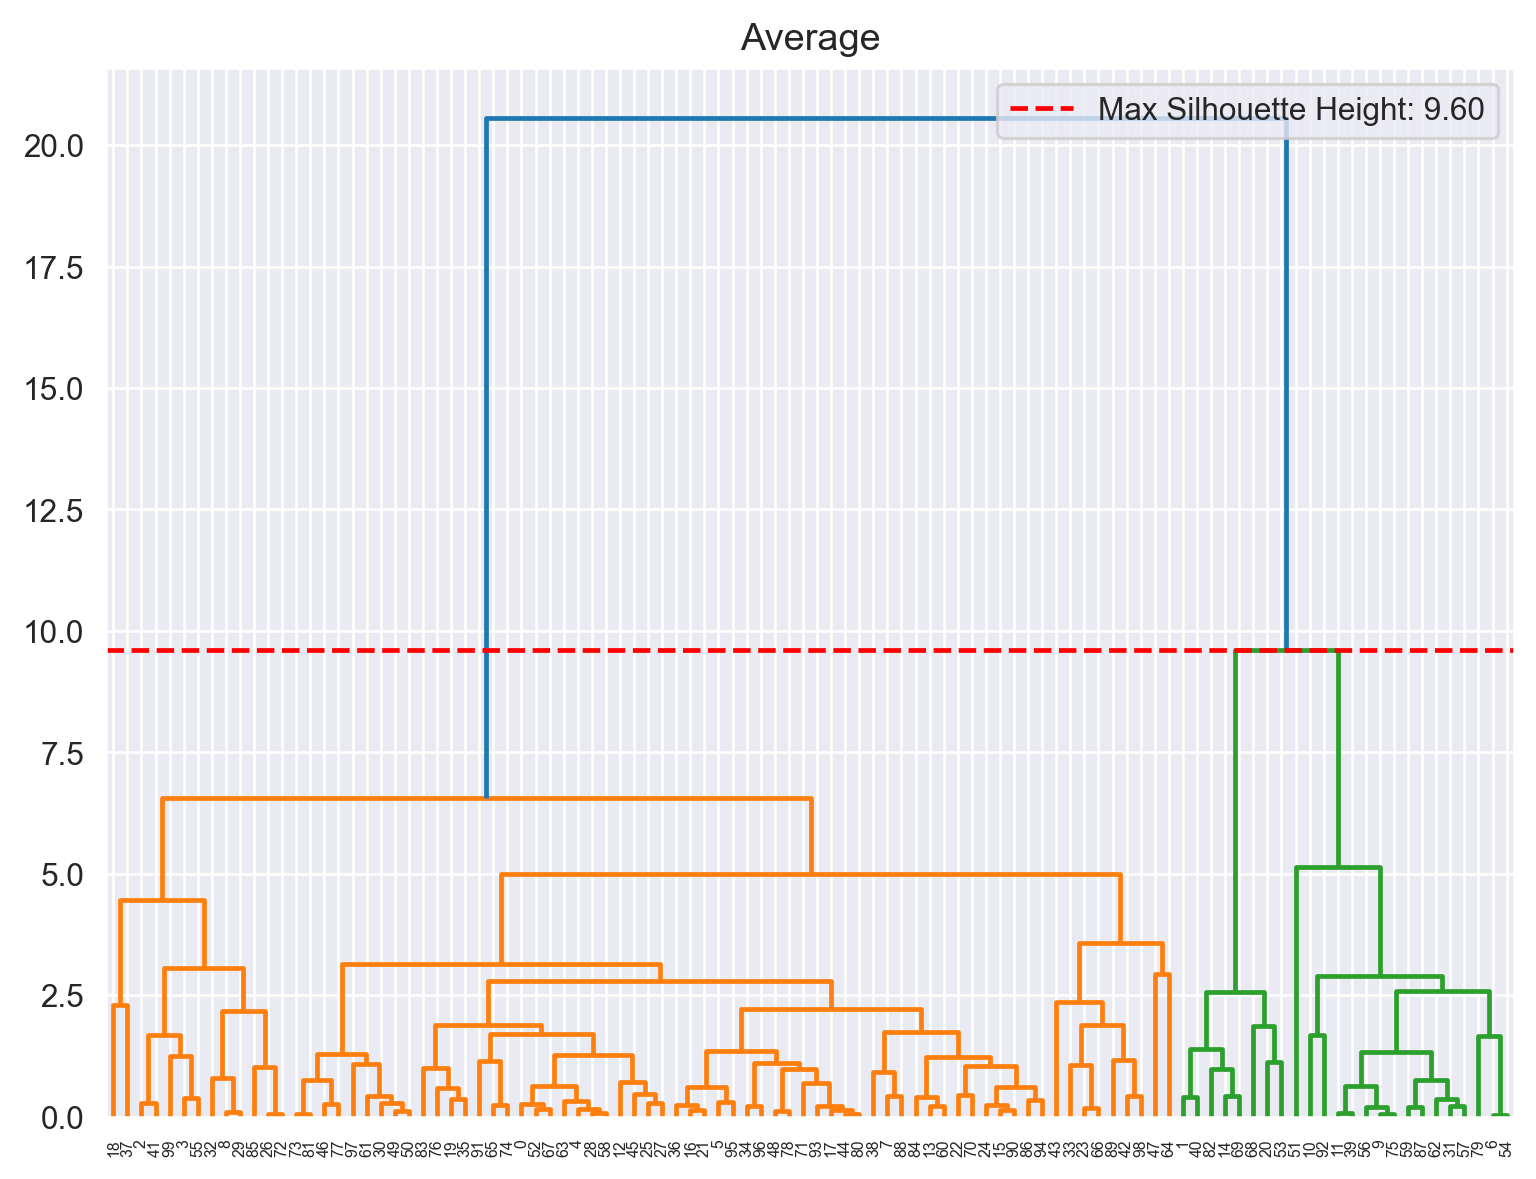

In [31]:
# Plot for Average linkage
plt.figure(figsize=(8, 6))
dendrogram(z_average)
plt.title('Average')
max_sil_height_2 = max_silhouette_height(z_average)[0]
plt.axhline(y=max_sil_height_2, color='red', linestyle='--', label='Max Silhouette Height: {:.2f}'.format(max_sil_height_2))
plt.legend()
plt.show()

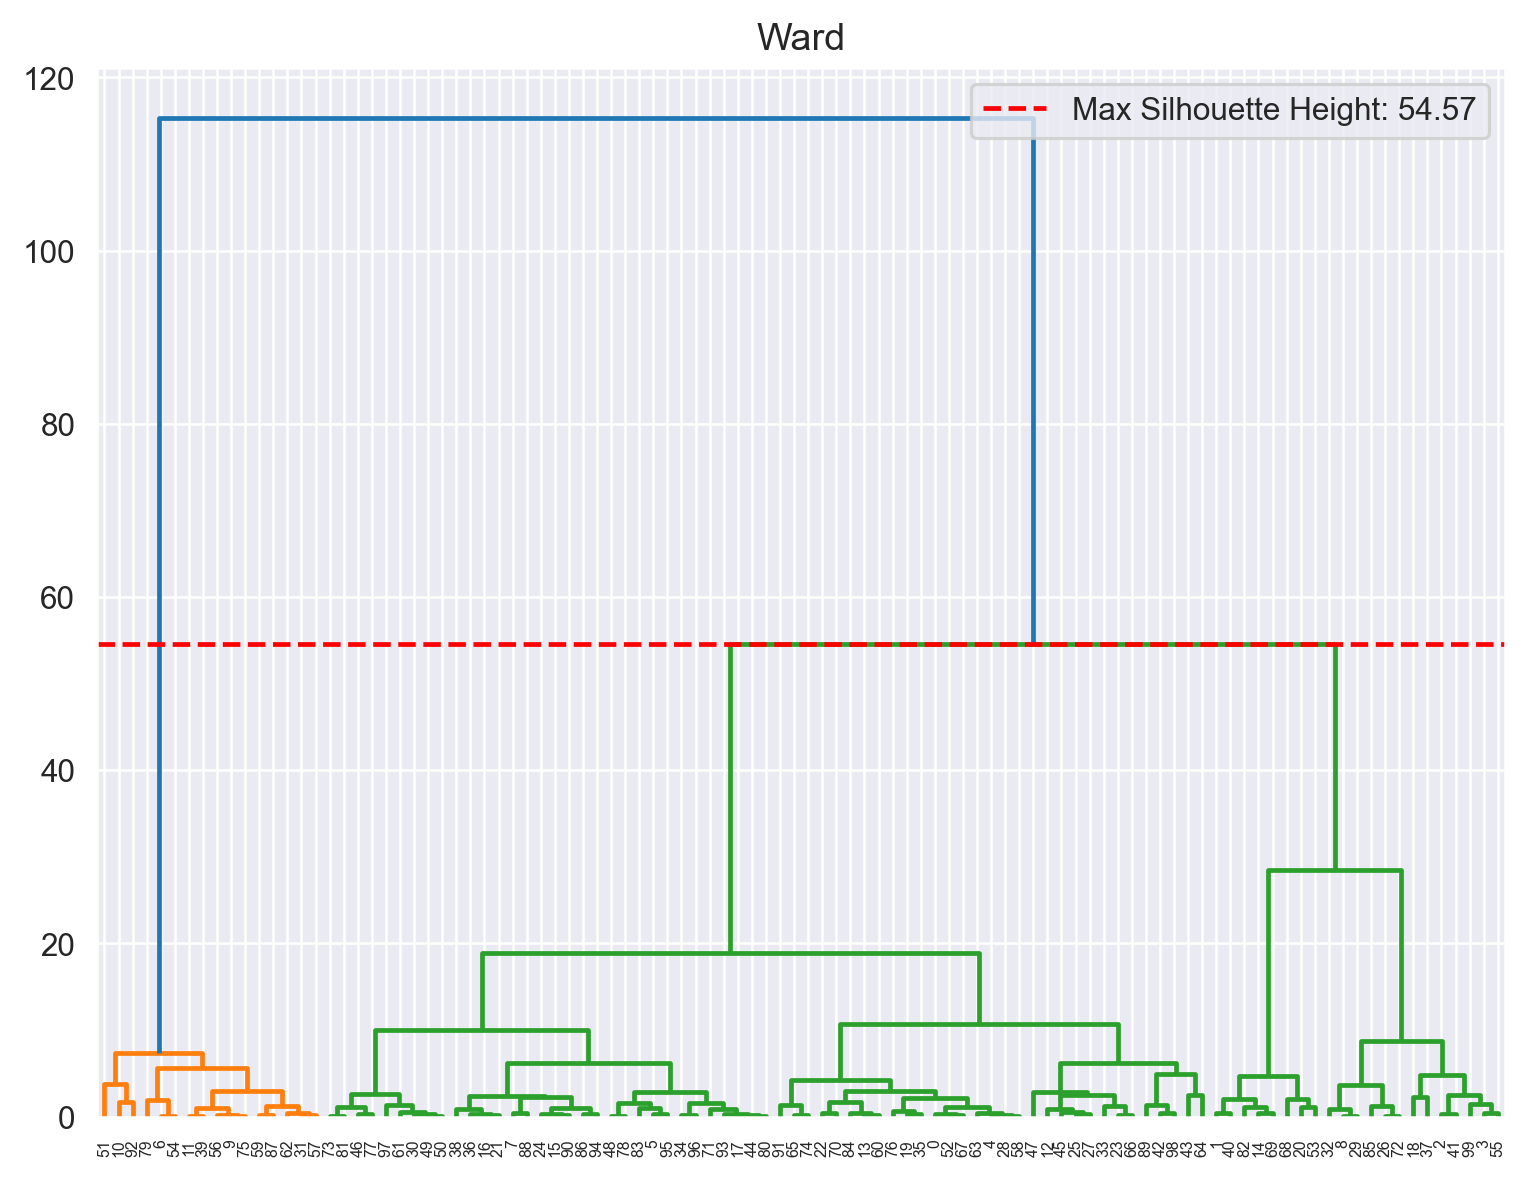

In [32]:
# Plot for Ward linkage
plt.figure(figsize=(8, 6))
dendrogram(z_ward)
plt.title('Ward')
max_sil_height_2 = max_silhouette_height(z_ward)[0]
plt.axhline(y=max_sil_height_2, color='red', linestyle='--', label='Max Silhouette Height: {:.2f}'.format(max_sil_height_2))
plt.legend()
plt.show()

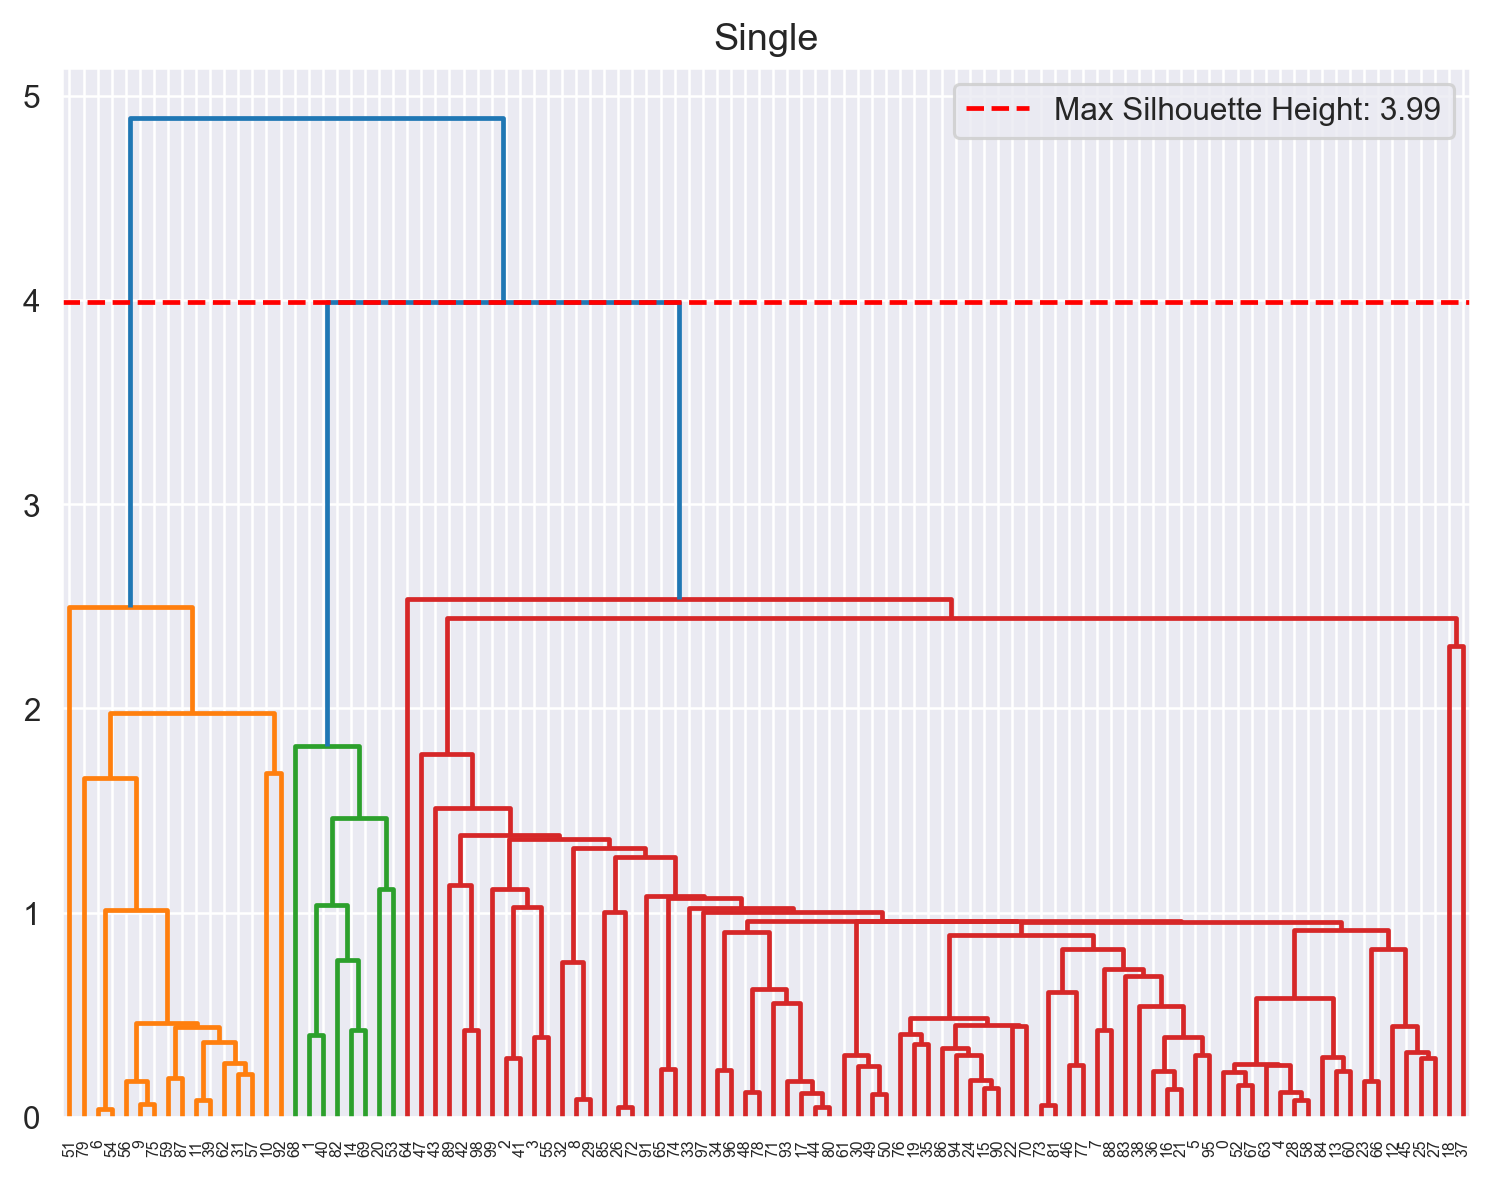

In [33]:
# Plot for Single linkage
plt.figure(figsize=(8, 6))
dendrogram(z_single)
plt.title('Single')
max_sil_height_2 = max_silhouette_height(z_single)[0]
plt.axhline(y=max_sil_height_2, color='red', linestyle='--', label='Max Silhouette Height: {:.2f}'.format(max_sil_height_2))
plt.legend()
plt.show()

# Comparison between k_medoids and Hierarchical

In [34]:
best_davies_bouldin_score=min([hierarchical_davies_bouldin,k_medoids_davies_bouldin])
best_silhouette_score=max([hierarchical_silhouette, k_medoids_silhouette])
print('the best davies_bouldin_score', best_davies_bouldin_score)
print('the best silhouette_score', best_silhouette_score)

the best davies_bouldin_score 0.35696426629688305
the best silhouette_score 0.7666998382741141


## Visualizing the Performance of each Clustering Method

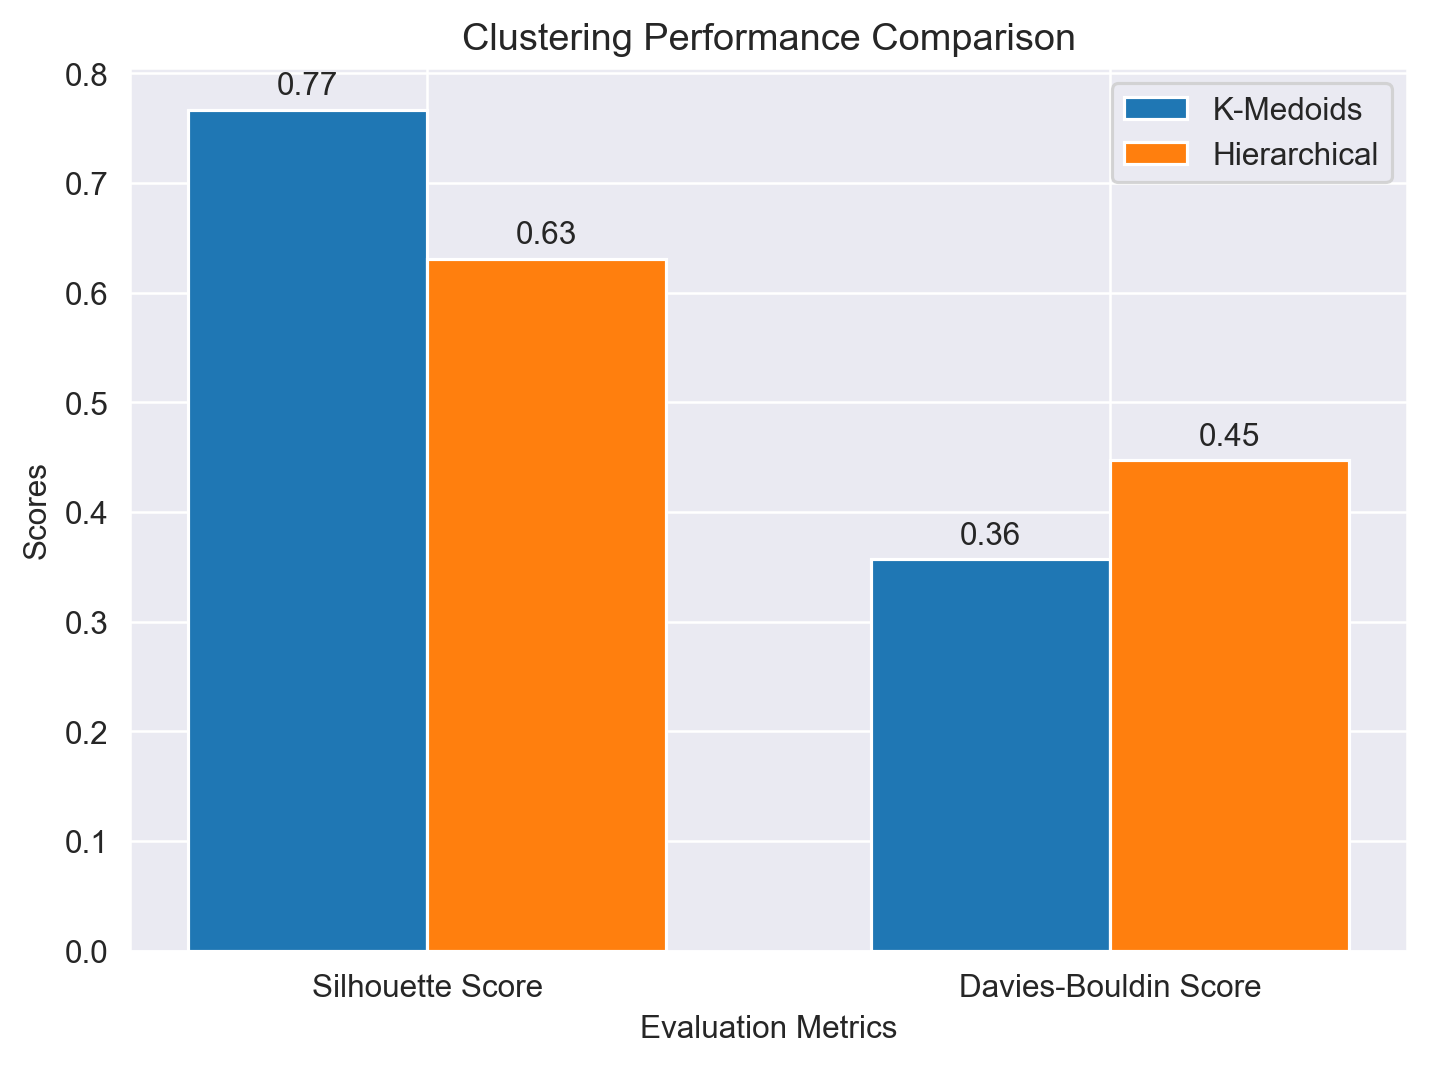

In [35]:
metrics = ['Silhouette Score', 'Davies-Bouldin Score']
k_medoids_scores = [k_medoids_silhouette, k_medoids_davies_bouldin]
hierarchical_scores = [hierarchical_silhouette, hierarchical_davies_bouldin]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, k_medoids_scores, width, label='K-Medoids')
rects2 = ax.bar(x + width/2, hierarchical_scores, width, label='Hierarchical')

ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Clustering Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()